In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import ipdb
np.random.seed(666)
num_observations = 500

x1 = np.random.multivariate_normal([0, 0],[[1, .5],[.5, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4],[[1, .5],[.5, 1]], num_observations)

X = np.vstack((x1, x2)).astype(np.float32)
Y = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

In [3]:
def show(X, y, w_0, w):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9, edgecolors='black')
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
    xy = np.c_[xx.ravel(), yy.ravel()]
    Z = np.dot(xy, w[:2]) + w[2:]
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='b')
    
    Z = np.dot(xy, w_0[:2]) + w[2:]
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='y')

    display.clear_output(wait=True)
    plt.title("Samples and Classifier")
    plt.show()

In [ ]:
class Variable():
    def __init__(self,):
        pass

In [10]:
class Perception():
    def __init__(self,x, y, lr=1) -> None:
        self.x = x
        self.y = y
        self.w = np.zeros((x.shape[1]+1, 1))
        self.lr=lr
        self.x = np.concatenate((self.x,np.ones((x.shape[0],1))), axis=1)
        self.grad = np.zeros_like(y).reshape(-1,1)

    def __f_x(self,input):
        return np.float32(input > 0)
    
    def forward(self,):
        self.y_i = self.__f_x(np.dot(self.x, self.w))
        self.y = np.reshape(self.y, self.y_i.shape)
        self.grad = self.y - self.y_i
        return self.y_i

    def backward(self,):
        w_t1 = self.w + self.lr * np.dot(self.x.T, self.grad)
        self.w = w_t1

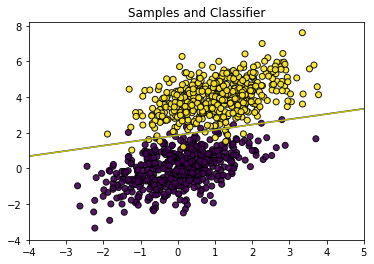

In [11]:
acc_s = []
model = Perception(X,Y)
for i in range(100):
    w_0 = model.w
    y_i = model.forward()
    # print(model.w)
    model.backward()
    if i%10 == 0:
        show(X, Y, w_0, model.w)
    acc = sum(y_i == Y)/len(Y)
    acc_s.append(acc)

    